# Preparations 

In [15]:
!pip install scanpy 

In [16]:
!pip install leidenalg

In [17]:
'''!pip install scDeepSort-v1.0-cu102.tar.gz'''

'!pip install scDeepSort-v1.0-cu102.tar.gz'

In [18]:
!pip install celltypist

In [19]:
!pip install protpy
!pip install biopython

# Choose one subdataset

In [20]:
import pandas as pd
import scanpy as sc
import os

dataset="GSM8207629_pat3_pre"

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if dataset.split("_")[0] in os.path.join(dirname, filename):
            print(os.path.join(dirname, filename))

fn = '/kaggle/input/gse263932/'+dataset+'_barcodes.tsv/barcodes.tsv'
obs = pd.read_csv(fn, sep = '\t', index_col = 0, header = None)
obs.index.name = 'Barcode'
# d.columns = ['Gene Symbol']
# d = d.reset_index()
# d = d.set_index('Gene Symbol' )
display(obs)
#%%time
fn = '/kaggle/input/gse263932/'+dataset+'_features.tsv/features.tsv'
var = pd.read_csv(fn, sep = '\t', header = None, names=['Gene EnsemblID','Gene Symbol','Description'])
#var.set_index("Gene EnsemblID", drop=True, inplace=True)
#var.index.name = 'Gene EnsemblID'
#var.columns = ['Gene Symbol']
var = var.reset_index()
var = var.set_index('Gene Symbol' )
var.drop(var.columns[0], axis=1,inplace=True)
display(var)
#%%time

# Load the .mtx file using Scanpy's read_mtx function
adata = sc.read_mtx("/kaggle/input/gse263932/"+dataset+"_matrix.mtx/matrix.mtx")
adata = adata.T

# Assign the row and column index to the AnnData object
adata.var = var
adata.obs = obs
isLogged=False # flag to prevent applying log scale twice
adata


/kaggle/input/gse263932/GSM8207629_pat3_pre_barcodes.tsv/barcodes.tsv
/kaggle/input/gse263932/GSM8207629_pat3_post_samples.csv/GSM8207629_pat3_post_samples.csv
/kaggle/input/gse263932/GSM8207629_pat3_pre_matrix.mtx/matrix.mtx
/kaggle/input/gse263932/GSM8207629_pat3_pre_features.tsv/features.tsv


""
Barcode
AAACCTGAGCGTTGCC-1
AAACCTGAGCTAACAA-1
AAACCTGAGTCAATAG-1
AAACCTGAGTTTAGGA-1
AAACCTGCACGGTGTC-1
...
TTTGTCACATCGTCGG-1
TTTGTCAGTGTGCCTG-1
TTTGTCATCTGATTCT-1


,Gene EnsemblID,Description
Gene Symbol,,
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression
...,...,...
AC141272.1,ENSG00000277836,Gene Expression
AC023491.2,ENSG00000278633,Gene Expression
AC007325.1,ENSG00000276017,Gene Expression


AnnData object with n_obs × n_vars = 4266 × 36601
    var: 'Gene EnsemblID', 'Description'

In [21]:
'''import pandas as pd
import scanpy as sc
import os
from scipy import io
import numpy as np

# Function to read a 10x dataset
def read_10x_mtx(mtx_dir):
    matrix = io.mmread(f'{mtx_dir}/matrix.mtx').tocsr()
    genes = pd.read_csv(f'{mtx_dir}/features.tsv', header=None, sep='\t')
    barcodes = pd.read_csv(f'{mtx_dir}/barcodes.tsv', header=None, sep='\t')
    # Debug prints to check the shapes
    #print(f'Matrix shape: {matrix.shape}')
    #print(f'Genes shape: {genes.shape}')
    #print(f'Barcodes shape: {barcodes.shape}')
    adata = sc.AnnData(matrix)
    adata=adata.transpose()
    adata.var['gene_ids'] = genes[0].values
    adata.var['gene_symbols'] = genes[1].values
    adata.var_names = adata.var['gene_symbols']
    adata.obs['barcodes'] = barcodes[0].values
    adata.obs_names = adata.obs['barcodes']
    return adata

# Load the first dataset
adata1 = read_10x_mtx('/kaggle/input/healthy-scrna-seq/GSM6249274_scRNA_2213_filtered_feature_bc_matrix/scRNA_2213_filtered_feature_bc_matrix/')

# Load the second dataset
adata2 = read_10x_mtx('/kaggle/input/healthy-scrna-seq/GSM6249275_scRNA_2224_filtered_feature_bc_matrix/scRNA_2224_filtered_feature_bc_matrix/')

# Load the third dataset
adata3 = read_10x_mtx('/kaggle/input/healthy-scrna-seq/GSM6249276_scRNA_2227_filtered_feature_bc_matrix/scRNA_2227_filtered_feature_bc_matrix/')

'''

"import pandas as pd\nimport scanpy as sc\nimport os\nfrom scipy import io\nimport numpy as np\n\n# Function to read a 10x dataset\ndef read_10x_mtx(mtx_dir):\n    matrix = io.mmread(f'{mtx_dir}/matrix.mtx').tocsr()\n    genes = pd.read_csv(f'{mtx_dir}/features.tsv', header=None, sep='\t')\n    barcodes = pd.read_csv(f'{mtx_dir}/barcodes.tsv', header=None, sep='\t')\n    # Debug prints to check the shapes\n    #print(f'Matrix shape: {matrix.shape}')\n    #print(f'Genes shape: {genes.shape}')\n    #print(f'Barcodes shape: {barcodes.shape}')\n    adata = sc.AnnData(matrix)\n    adata=adata.transpose()\n    adata.var['gene_ids'] = genes[0].values\n    adata.var['gene_symbols'] = genes[1].values\n    adata.var_names = adata.var['gene_symbols']\n    adata.obs['barcodes'] = barcodes[0].values\n    adata.obs_names = adata.obs['barcodes']\n    return adata\n\n# Load the first dataset\nadata1 = read_10x_mtx('/kaggle/input/healthy-scrna-seq/GSM6249274_scRNA_2213_filtered_feature_bc_matrix/scRNA_

In [22]:
'''import anndata as ad
# Combine the datasets
#adata = adata1.concatenate([adata2, adata3], batch_key='batch', batch_categories=['GSM6249274', 'GSM6249275', 'GSM6249276'])

adata1.var_names_make_unique()
adata2.var_names_make_unique()
adata3.var_names_make_unique()

adatas={'GSM6249274': adata1, 'GSM6249275': adata2, 'GSM6249276': adata3}
adata = ad.concat(adatas, label="batch")
isLogged=False # flag to prevent applying log scale twice
adata'''

'import anndata as ad\n# Combine the datasets\n#adata = adata1.concatenate([adata2, adata3], batch_key=\'batch\', batch_categories=[\'GSM6249274\', \'GSM6249275\', \'GSM6249276\'])\n\nadata1.var_names_make_unique()\nadata2.var_names_make_unique()\nadata3.var_names_make_unique()\n\nadatas={\'GSM6249274\': adata1, \'GSM6249275\': adata2, \'GSM6249276\': adata3}\nadata = ad.concat(adatas, label="batch")\nisLogged=False # flag to prevent applying log scale twice\nadata'

# In case of h5 file

In [23]:
'''import scanpy as sc
adata = sc.read_10x_h5('/kaggle/input/scleroderma-skin-scrna-seq/B/filtered_feature_bc_matrix.h5')'''

"import scanpy as sc\nadata = sc.read_10x_h5('/kaggle/input/scleroderma-skin-scrna-seq/B/filtered_feature_bc_matrix.h5')"

In [24]:
'''import h5py

def print_hdf5_structure(file_name):
    with h5py.File(file_name, 'r') as f:
        def print_attrs(name, obj):
            if isinstance(obj, h5py.Dataset):
                print(f"Dataset: {name}")
            elif isinstance(obj, h5py.Group):
                print(f"Group: {name}")

        f.visititems(print_attrs)

# Replace 'your_file.h5' with the path to your HDF5 file
print_hdf5_structure('/kaggle/input/scleroderma-skin-scrna-seq/B/filtered_feature_bc_matrix.h5')

adata = sc.read_10x_h5('/kaggle/input/scleroderma-skin-scrna-seq/B/filtered_feature_bc_matrix.h5')'''


'import h5py\n\ndef print_hdf5_structure(file_name):\n    with h5py.File(file_name, \'r\') as f:\n        def print_attrs(name, obj):\n            if isinstance(obj, h5py.Dataset):\n                print(f"Dataset: {name}")\n            elif isinstance(obj, h5py.Group):\n                print(f"Group: {name}")\n\n        f.visititems(print_attrs)\n\n# Replace \'your_file.h5\' with the path to your HDF5 file\nprint_hdf5_structure(\'/kaggle/input/scleroderma-skin-scrna-seq/B/filtered_feature_bc_matrix.h5\')\n\nadata = sc.read_10x_h5(\'/kaggle/input/scleroderma-skin-scrna-seq/B/filtered_feature_bc_matrix.h5\')'

# Preprocessing

... storing 'Description' as categorical


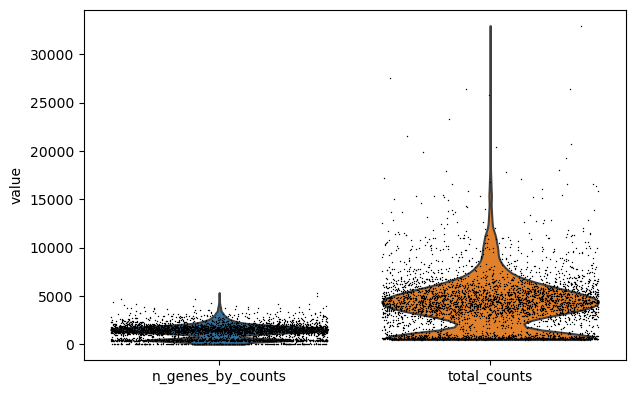

In [25]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
adata.var_names_make_unique()
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4)

# adata.layers["counts"] is adata after filtering and normalization but before log scaling

In [26]:
!pip install --user magic-impute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.2 MB/s eta 0:00:0000:0100:01


In [27]:
import scanpy.external as sce

# for exporting signature matrix
sc.pp.filter_cells(data=adata, min_counts=3, inplace=True)
#sc.pp.filter_cells(data=adata, max_counts=25000, inplace=True)
sc.pp.filter_cells(data=adata, min_genes=200, inplace=True)
sc.pp.filter_cells(data=adata, max_genes=2500, inplace=True)

if(isLogged==True):
    print("Data is already logged. Did not perform scaling and transformation again.")
        
else:
    sc.pp.normalize_total(adata, target_sum=1e4)

    adata.layers["counts"]=adata.X.copy()

    sc.pp.log1p(adata)
    sce.pp.magic(adata, name_list='all_genes', knn=5)
    #
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    adata.var_names_make_unique()
    display(adata.to_df().describe())
    isLogged=True

/root/.local/lib/python3.7/site-packages/magic/magic.py:426: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "


  Running MAGIC with `solver='exact'` on 36601-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


/root/.local/lib/python3.7/site-packages/magic/utils.py:145: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  data = anndata.AnnData(data)


Gene Symbol,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
count,3824.0,3824.0,3824.0,3824.000000,3824.0,3824.0,3824.000000,3824.0,3824.0,3824.0,...,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0,3824.0
mean,0.0,0.0,0.0,0.001756,0.0,0.0,0.007538,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.002503,0.0,0.0,0.007683,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.000086,0.0,0.0,0.003056,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.001187,0.0,0.0,0.005072,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.002373,0.0,0.0,0.009158,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.062393,0.0,0.0,0.101925,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


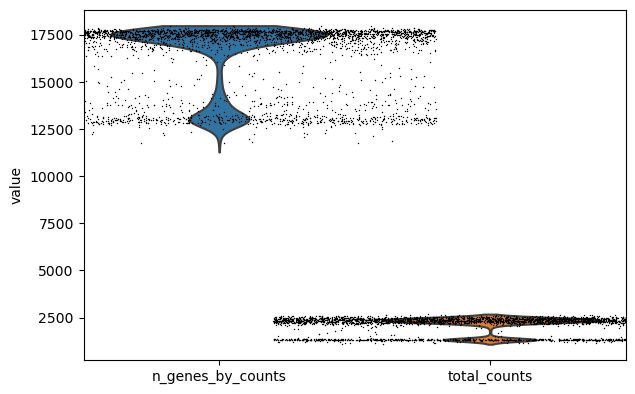

In [28]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.8)

In [30]:
print(len(set(adata.obs.index)))
adata.obs_names_make_unique()
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_counts,n_genes
Barcode,,,,,,,,,,
AAACCTGAGCGTTGCC-1,17438,9.766464,2243.399902,7.716194,9.269300,16.647780,25.575480,38.939745,4403.0,1382
AAACCTGAGCTAACAA-1,17585,9.774858,2454.334717,7.806018,8.479389,15.153703,23.582455,36.672009,6284.0,1882
AAACCTGAGTCAATAG-1,12971,9.470548,1317.096680,7.183944,12.884158,21.515026,32.294203,47.371307,505.0,376
AAACCTGCACGGTGTC-1,17446,9.766923,2197.998535,7.695757,9.573603,17.105403,26.226306,39.627724,1636.0,740
AAACCTGGTCGGCATC-1,17475,9.768584,2387.231445,7.778308,8.742420,15.646905,24.250923,37.422324,2930.0,1224
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTCATCCA-1,12966,9.470163,1376.512573,7.228034,13.057308,21.930497,32.510104,47.357416,753.0,504
TTTGTCACATCGTCGG-1,17529,9.771669,2388.541748,7.778857,8.692387,15.528500,24.153834,37.345129,3535.0,1338
TTTGTCATCTGATTCT-1,17123,9.748236,2458.339600,7.807648,8.368849,15.039383,23.457499,36.600041,3993.0,1572


In [31]:
import celltypist
model = celltypist.models.Model.load(model = 'Healthy_COVID19_PBMC.pkl')
predictions=celltypist.annotate(adata, model=model, majority_voting=True)
#adata.obs_names_make_unique()
adata.obs["cell_type"]=predictions.predicted_labels["majority_voting"]


In [ ]:
'''display(adata.obs.sum())'''

In [32]:
sc.pp.highly_variable_genes(adata)
adata.var

,Gene EnsemblID,Description,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm
Gene Symbol,,,,,,,,,,,,
MIR1302-2HG,ENSG00000243485,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.000000
FAM138A,ENSG00000237613,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.000000
OR4F5,ENSG00000186092,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.000000
AL627309.1,ENSG00000238009,Gene Expression,2912,0.001756,0.001755,23.849372,6.716521,2.043364,False,1.759564e-03,-5.617581,-1.280526
AL627309.3,ENSG00000239945,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.000000
AC023491.2,ENSG00000278633,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.000000
AC007325.1,ENSG00000276017,Gene Expression,0,0.000000,0.000000,100.000000,0.000000,0.000000,False,1.000000e-12,NaN,0.000000


In [33]:
adata.var[adata.var.highly_variable]

,Gene EnsemblID,Description,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm
Gene Symbol,,,,,,,,,,,,
LINC01128,ENSG00000228794,Gene Expression,3822,0.039888,0.039113,0.052301,152.530090,5.033896,True,0.042751,-1.707566,2.913997
HES4,ENSG00000188290,Gene Expression,3803,0.019633,0.019443,0.549163,75.077782,4.331756,True,0.020523,-2.301231,2.277135
ISG15,ENSG00000187608,Gene Expression,3824,0.779469,0.576315,0.000000,2980.689453,8.000245,True,0.835188,-0.583828,1.366635
B3GALT6,ENSG00000176022,Gene Expression,3824,0.107603,0.102199,0.000000,411.475677,6.022177,True,0.108546,-3.909974,0.551333
CPTP,ENSG00000224051,Gene Expression,3824,0.080542,0.077462,0.000000,307.991028,5.733312,True,0.081273,-3.877162,0.586533
...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ATP6,ENSG00000198899,Gene Expression,3824,2.790328,1.332453,0.000000,10670.213867,9.275305,True,2.914863,2.435995,1.655057
MT-ND4,ENSG00000198886,Gene Expression,3824,2.828287,1.342417,0.000000,10815.368164,9.288815,True,2.929617,2.357706,1.512740
MT-ND5,ENSG00000198786,Gene Expression,3824,2.581647,1.275823,0.000000,9872.217773,9.197581,True,2.697349,2.374818,1.950074


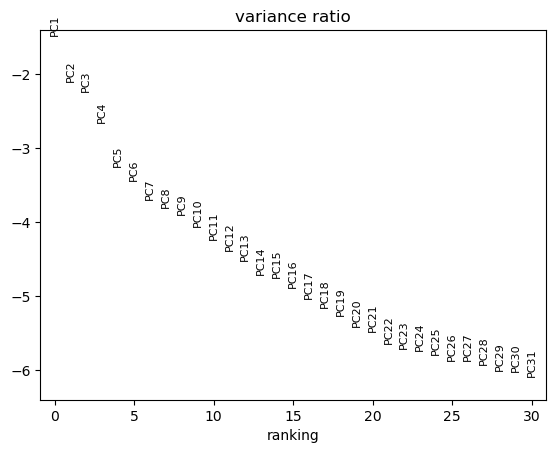

In [34]:
adata.raw=adata
adata=adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts'])
sc.pp.scale(adata,max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata,log=True)

In [ ]:
'''counts_df=pd.DataFrame(adata.layers["counts"].toarray(), index=adata.obs_names, columns=adata.var_names)'''

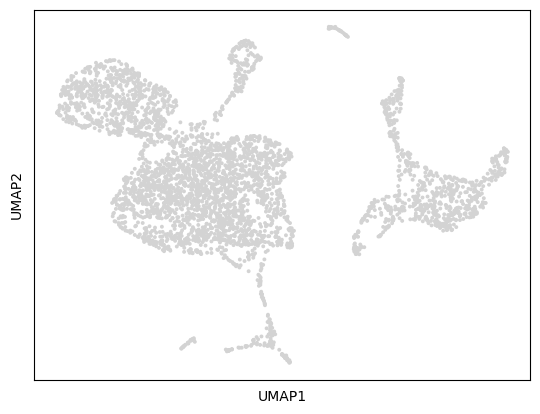

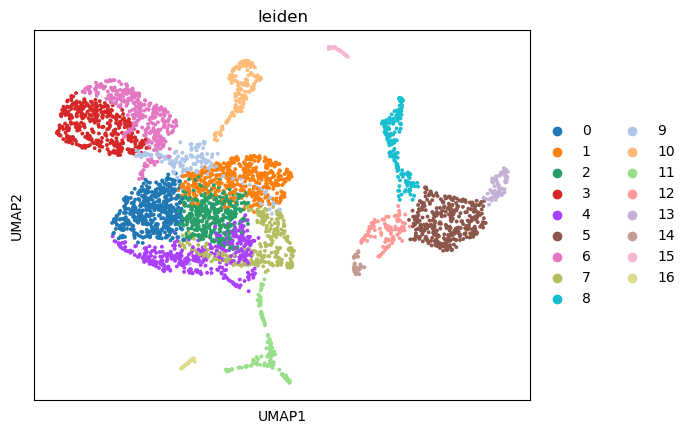

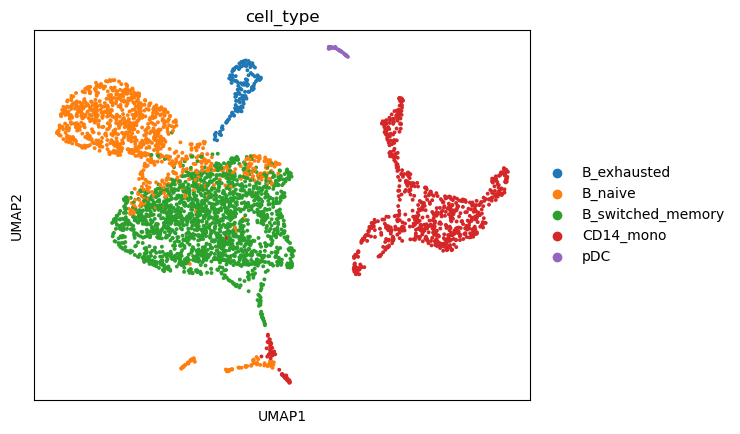

In [35]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=12)
sc.tl.umap(adata)
sc.pl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color=['leiden'])
sc.pl.umap(adata, color=['cell_type'])

# If you wanna go with unsupervised clustering and not CellTypist

In [ ]:
'''adata.obs["cell_type"]=adata.obs["leiden"]'''

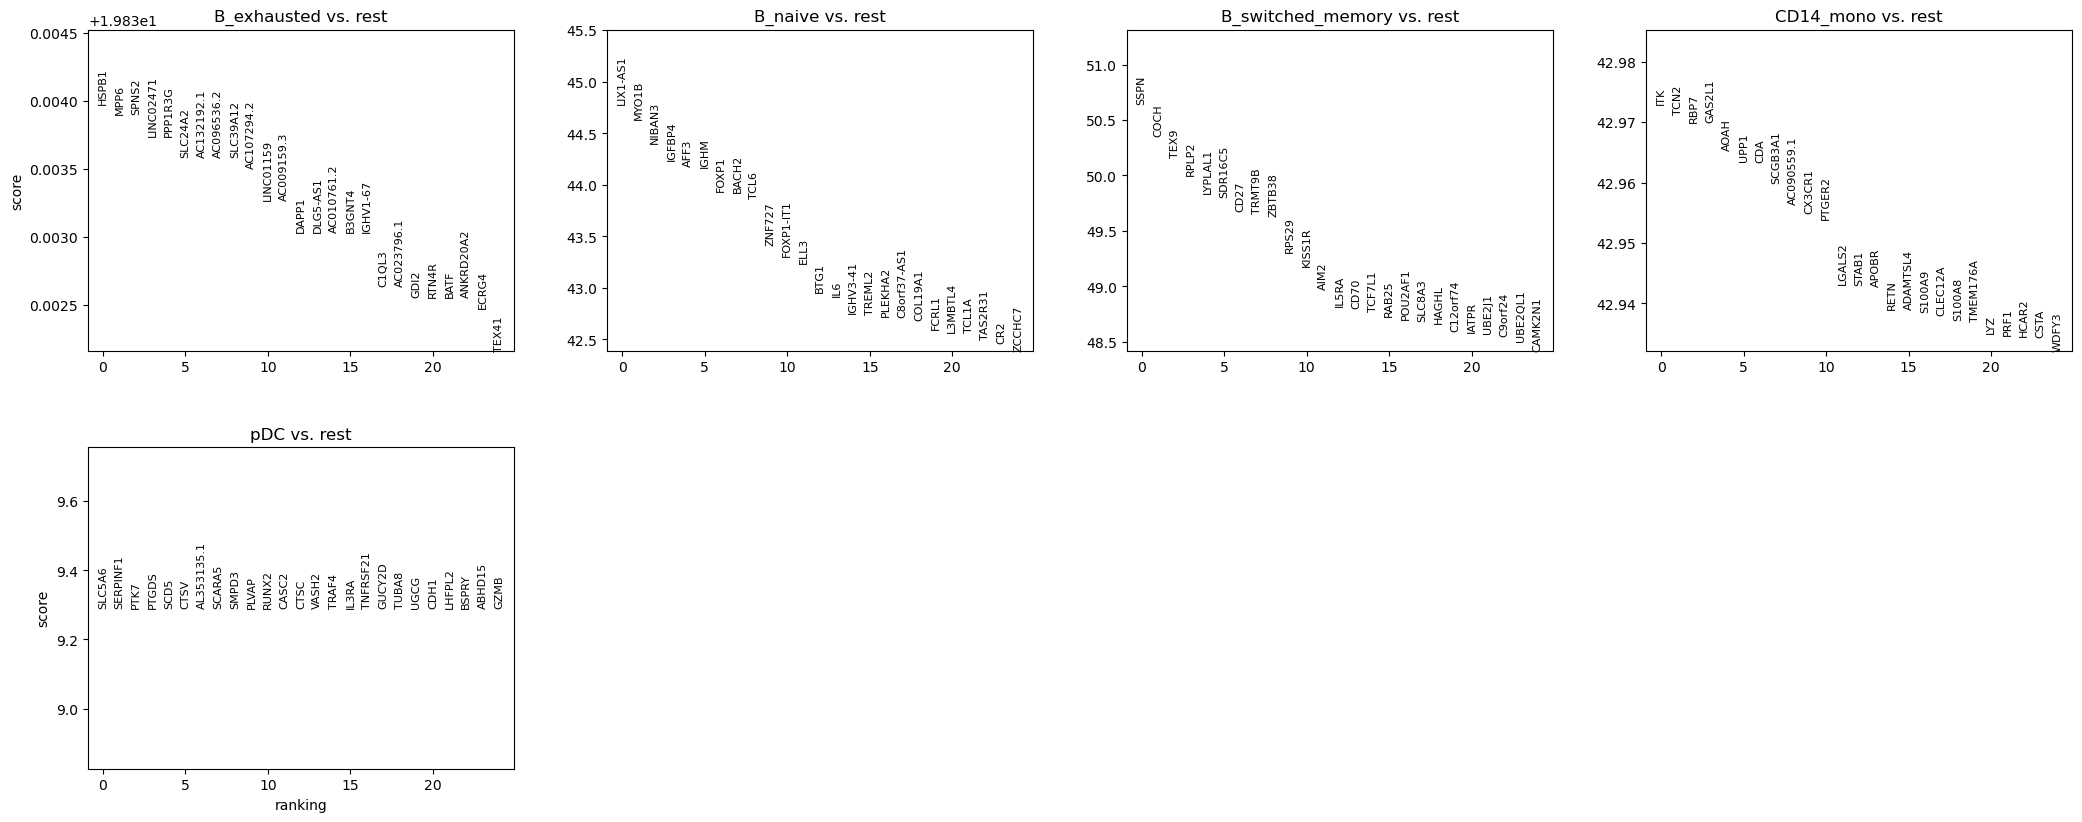

In [36]:
sc.tl.rank_genes_groups(adata, 'cell_type', method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

# Define a list of proteins that are considered surface markers

In [37]:
cell_locations=pd.read_csv("/kaggle/input/protein-locations/subcellular_location.tsv", sep='\t', header=0)
display(cell_locations)
cell_locations = cell_locations.dropna(subset=["Main location"])
cell_locations = cell_locations[cell_locations["Main location"].str.contains("Plasma membrane")]

surf_markers=list(cell_locations["Gene name"])
surf_markers.append("CD19")
surf_markers.append("TNFRSF17")
print(surf_markers)

,Gene,Gene name,Reliability,Main location,Additional location,Extracellular location,Enhanced,Supported,Approved,Uncertain,Single-cell variation intensity,Single-cell variation spatial,Cell cycle dependency,GO id
0,ENSG00000000003,TSPAN6,Approved,Cell Junctions;Cytosol,Nucleoli fibrillar center,NaN,NaN,NaN,Cell Junctions;Cytosol;Nucleoli fibrillar center,NaN,Cytosol,NaN,NaN,Cell Junctions (GO:0030054);Cytosol (GO:000582...
1,ENSG00000000457,SCYL3,Supported,Cytosol;Golgi apparatus,NaN,NaN,NaN,Cytosol;Golgi apparatus,NaN,NaN,NaN,NaN,NaN,Cytosol (GO:0005829);Golgi apparatus (GO:0005794)
2,ENSG00000000460,C1orf112,Approved,Mitochondria,NaN,NaN,NaN,NaN,Mitochondria,NaN,NaN,NaN,NaN,Mitochondria (GO:0005739)
3,ENSG00000000938,FGR,Approved,Plasma membrane,Aggresome,NaN,NaN,NaN,Aggresome;Plasma membrane,NaN,NaN,NaN,NaN,Aggresome (GO:0016235);Plasma membrane (GO:000...
4,ENSG00000000971,CFH,Approved,Vesicles,NaN,Predicted to be secreted,NaN,NaN,Vesicles,NaN,NaN,NaN,NaN,Vesicles (GO:0043231)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13142,ENSG00000290292,HOMEZ,Supported,Nucleoli,Cytosol;Nucleoplasm,NaN,NaN,Nucleoli;Nucleoplasm,Cytosol,NaN,NaN,NaN,NaN,Cytosol (GO:0005829);Nucleoli (GO:0005730);Nuc...
13143,ENSG00000290315,ENSG00000290315,Approved,Cytosol;Nucleoplasm,Rods & Rings,NaN,NaN,NaN,Cytosol;Nucleoplasm;Rods & Rings,NaN,Cytosol;Rods & Rings,NaN,NaN,Cytosol (GO:0005829);Nucleoplasm (GO:0005654);...
13144,ENSG00000290317,ENSG00000290317,Approved,Nucleoplasm,Golgi apparatus,NaN,NaN,NaN,Golgi apparatus;Nucleoplasm,NaN,NaN,NaN,NaN,Golgi apparatus (GO:0005794);Nucleoplasm (GO:0...
13145,ENSG00000291237,SOD2,Supported,Mitochondria,NaN,NaN,NaN,Mitochondria,NaN,NaN,NaN,NaN,NaN,Mitochondria (GO:0005739)


['FGR', 'ANKIB1', 'LASP1', 'CFLAR', 'SLC7A2', 'CD38', 'ARHGAP33', 'SLC22A16', 'ZMYND10', 'SPPL2B', 'ABCB4', 'ITGA3', 'ITGA2B', 'CX3CL1', 'TNFRSF12A', 'RALA', 'BAIAP2L1', 'TBXA2R', 'IFRD1', 'SCIN', 'CCDC124', 'GAS7', 'CEACAM7', 'CD79B', 'MMP25', 'RHOBTB2', 'TENM1', 'IYD', 'CD9', 'CD4', 'BTK', 'HFE', 'FYN', 'CLCN6', 'SLC6A7', 'PLAUR', 'TYROBP', 'GABRA3', 'EHD3', 'GPRC5A', 'WAS', 'NUDCD3', 'CLCA4', 'SLC38A5', 'RALBP1', 'ADGRA2', 'GABRA1', 'SLC45A4', 'ZNF839', 'GRAMD1B', 'AKAP11', 'EHD2', 'CCDC28A', 'FAS', 'CD44', 'IFNGR1', 'LRRC7', 'GAB2', 'SLC4A7', 'FLT4', 'MAT2B', 'CDH1', 'RTN4R', 'RAB27B', 'ADAM28', 'CTNNA1', 'EPHA3', 'ANO2', 'MAP4', 'GUCA1A', 'TNFRSF9', 'ELN', 'ARHGEF5', 'LIMA1', 'SLC4A8', 'MAPK9', 'BCAR1', 'HERPUD1', 'MPHOSPH9', 'TTC17', 'GINM1', 'NPFFR2', 'IL17RB', 'DCBLD2', 'GDI2', 'CAMK2B', 'ATP2B4', 'DGKG', 'SLC2A3', 'STYK1', 'LZTS1', 'TNK2', 'CDH3', 'EPN1', 'GPC1', 'CCN5', 'ATP2C2', 'NGFR', 'SLC12A2', 'ABCA7', 'CALCRL', 'SLC9A3R2', 'GLP2R', 'ERBB3', 'COL17A1', 'ME1', 'PDE4A', 'S

# Histograms: Conditional Median and Weighted Median

In [38]:
def intersection(lst1, lst2):
    return list(set(lst1).intersection(lst2))

# finding upregulated proteins in scRNA-seq. Lupus biomarkers adopted from https://www.frontiersin.org/journals/genetics/articles/10.3389/fgene.2022.941221/full
upregProts_literature=['RSAD2', 'IFIT3', 'APOBEC3A', 'IFIT2', 'PARP9', 'DTX3L', 'PLSCR1', 'IFI35', 'ISG15', 'CMPK2', 'HERC5', 'GBP1', 'IFI27', 'STAT1', 'MX1', 'IRF7', 'OAS1', 'OAS2', 'OAS3', 'OASL', 'IFIH1', 'SIGLEC1', 'LGALS9', 'BST2']
upregProts=intersection(upregProts_literature, adata.var.index)
'''for elem in adata.var.index:
    for p in upregProts:
        if(p == elem):
            print(elem)'''
print("Disease related proteins considered:")
print(upregProts)

Disease related proteins considered:
['GBP1', 'SIGLEC1', 'OAS3', 'LGALS9', 'IFIH1', 'ISG15', 'OASL', 'IFI27', 'DTX3L', 'IFIT2', 'APOBEC3A', 'CMPK2', 'IRF7', 'RSAD2']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

upregProt = "S100A9"
zero_weight = 0.25 # for weighted median
conditional_threshold=0.15 # for conditional non zero median

def weighted_median(data, weights):
    """
    Compute the weighted median of data.
    
    Parameters:
    data (array-like): Input data.
    weights (array-like): Weights for each data point.
    
    Returns:
    float: Weighted median.
    """
    data, weights = np.array(data), np.array(weights)
    sorted_indices = np.argsort(data)
    sorted_data = data[sorted_indices]
    sorted_weights = weights[sorted_indices]
    cumulative_weight = np.cumsum(sorted_weights)
    cutoff = 0.5 * np.sum(sorted_weights)
    return sorted_data[np.where(cumulative_weight >= cutoff)[0][0]]

def conditional_non_zero_median(data, threshold=0.15):
    """
    Compute the median of non-zero values if they constitute more than 
    a given threshold proportion of the total population.
    
    Parameters:
    data (array-like): Input data.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    float: Median of non-zero values if condition is met, otherwise NaN.
    """
    non_zero_vals = data[data > 0]
    if len(non_zero_vals) / len(data) > threshold:
        return np.median(non_zero_vals)
    else:
        return np.nan
    
def conditional_non_zero_median_df(data, threshold=0.15):
    """
    Compute the median of non-zero values for each column in a DataFrame
    if they constitute more than a given threshold proportion of the total population.
    
    Parameters:
    data (DataFrame): Input DataFrame.
    threshold (float): Proportion threshold for non-zero values.
    
    Returns:
    Series: Medians of non-zero values for each column if condition is met, otherwise NaN.
    """
    medians = {}
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            non_zero_vals = data[col][data[col] > 0]
            if len(non_zero_vals) / len(data[col]) > threshold:
                medians[col] = np.median(non_zero_vals)
            else:
                medians[col] = np.nan
        else:
            medians[col] = np.nan
    return pd.Series(medians)


# Uses gene counts per 10,000 cells for score calculation
cellMatrix = pd.DataFrame(adata.layers["counts"].toarray(), index=adata.obs_names, columns=adata.var_names)
cellMatrix['cell_type'] = adata.obs['cell_type']
cellTypes = list(cellMatrix['cell_type'].unique())
fig, axs = plt.subplots(nrows=len(cellTypes), ncols=1, figsize=(6, 4 * len(cellTypes)))

for i, cell_t in enumerate(cellTypes):
    vals = cellMatrix.loc[cellMatrix['cell_type'] == cell_t, upregProt]
    
    # Assign weights: give a lower weight to zero values
    weights = np.ones_like(vals)
    weights[vals == 0] = zero_weight  # Assign a weight of 0.25 to zero values
    
    axs[i].hist(vals, bins=range(0, 60), color='#226399')
    axs[i].set_title(f"{upregProt} content in {cell_t}")
    axs[i].axvline(weighted_median(vals, weights), color='#D81B60', linestyle='dashed', linewidth=2, label='Weighted Median')
    axs[i].axvline(vals.mean(), color='#1E88E5', linestyle='dashed', linewidth=2, label='Mean')
    axs[i].axvline(vals.median(), color='#FFC107', linestyle='dashed', linewidth=2, label='Median')
    non_zero_median=conditional_non_zero_median(vals, threshold=conditional_threshold)
    if not np.isnan(non_zero_median):
        axs[i].axvline(non_zero_median, color='#004D40', linestyle='dashed', linewidth=2, label='Non-zero Median')
    else:
        axs[i].axvline(0, color='#004D40', linestyle='dashed', linewidth=2, label='Non-zero Median')
    axs[i].legend(loc='upper right')
    axs[i].set_xlabel("Number of genes expressions")
    axs[i].set_ylabel("Number of cells")
    axs[i].text(60, 
                0, 
                f"w. median zero weight: {zero_weight:.2f}\ncond. median threshold: {conditional_threshold:.2f}\n", 
                fontsize = 10, 
                bbox = dict(facecolor = 'white', alpha = 0.5),
                horizontalalignment='right',
                verticalalignment='bottom')

plt.tight_layout()
plt.savefig("Mean and Median Modifications.png")
plt.show()


In [ ]:
cellMatrix

In [ ]:
zero_weight = 0.25 # for weighted median
conditional_threshold=0.15 # for conditional non zero median

for CT in cellTypes:
    means=[]
    medians=[]
    w_medians=[]
    c_medians=[]
    temp_cellMatrix=cellMatrix.loc[cellMatrix['cell_type']==CT,:].copy()
    temp_cellMatrix.drop("cell_type", inplace=True, axis=1)
    for gene in temp_cellMatrix.columns:
        print(CT+">>"+gene)
        # Assign weights: give a lower weight to zero values
        weights = np.ones_like(temp_cellMatrix[gene])
        weights[temp_cellMatrix[gene] == 0] = zero_weight  # Assign a weight of 0.25 to zero values
        means.append(temp_cellMatrix[gene].mean())
        medians.append(temp_cellMatrix[gene].median())
        w_medians.append(weighted_median(temp_cellMatrix[gene], weights))
        non_zero_median=conditional_non_zero_median(temp_cellMatrix[gene], threshold=conditional_threshold)
        if not np.isnan(non_zero_median):
            c_medians.append(non_zero_median)
        else:
            c_medians.append(0)
    results=pd.DataFrame({"Mean": means, "Median": medians, "W_Medians": w_medians, "C_Medians": c_medians}, index=temp_cellMatrix.columns)
    results.to_excel(CT+"_stats.xlsx")
    display(results.describe())
    
import zipfile
import os

zipfile_name="Cell_Type_Stats.zip"
directory = "/kaggle/working/"  # The directory to search in

# Find the files that contain the search string
files_to_zip = [f for f in os.listdir(directory) if "_stats" in f and not "zip" in f]

# Create the zip file and add the filtered files
with zipfile.ZipFile(zipfile_name, 'w') as zipf:
    for file in files_to_zip:
        zipf.write(os.path.join(directory, file), arcname=file)


In [110]:
from Bio import SeqIO
import protpy as protpy
import numpy as np

def get_fasta(geneList):
    gene_to_seq = {}
    sequences=[]
    geneList=list(geneList)
    successfulGenes=[]

    for record in SeqIO.parse("/kaggle/input/uniprot-swissprot-fasta/uniprot_sprot.fasta", "fasta"):
        org=record.name.split("|")[2].split("_")[1]
        try:
            gene=record.description.split("GN=")[1].split(" ")[0]
        except Exception as e:
            print(e)
            gene=record.name.split("|")[2].split("_")[0]
        if(org == "HUMAN" and gene in geneList):
            gene_to_seq[gene]=record.seq
            #print(gene_to_seq)
    for gene in geneList:
        try:
            new_seq=gene_to_seq[gene]
            sequences.append(new_seq)
            successfulGenes.append(gene)
        except Exception as e:
            print(e)
    return sequences, successfulGenes

prots=[g for g in surf_markers if g in list(adata.var_names)]
seqs, genes_found=get_fasta(prots) # use genes in common between surface markers and dataset
desc_lookup=pd.DataFrame({"Gene": genes_found, "FASTA": seqs})
descList=[]
for seq in seqs:
    descList.append(protpy.dipeptide_composition(str(seq)))
desc_lookup=desc_lookup.join(pd.DataFrame(np.squeeze(descList)))
desc_lookup.drop("FASTA", inplace=True, axis=1)
desc_lookup.set_index("Gene", inplace=True)
display(desc_lookup)

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out o

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Gene,,,,,,,,,,,,,,,,,,,,,
FGR,0.76,0.19,0.38,0.76,0.38,0.19,0.19,0.19,0.38,0.38,...,0.38,0.19,0.19,0.19,0.00,0.38,0.00,0.19,0.00,0.19
ANKIB1,0.83,0.28,0.37,0.74,0.09,0.37,0.28,0.37,0.28,0.92,...,0.00,0.09,0.09,0.18,0.18,0.00,0.18,0.00,0.00,0.18
CD38,0.33,0.33,0.33,0.33,0.67,0.00,0.33,0.00,0.00,0.00,...,0.00,0.00,0.00,0.67,0.33,0.00,0.33,0.00,0.00,0.00
SPPL2B,1.02,0.51,0.34,0.34,0.34,0.51,0.17,0.17,0.17,1.69,...,0.34,0.34,0.00,0.00,0.00,0.17,0.00,0.17,0.17,0.17
ABCB4,1.09,0.00,0.16,0.39,0.70,0.93,0.39,0.86,0.70,1.01,...,0.00,0.00,0.16,0.08,0.08,0.23,0.08,0.16,0.00,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IGKV3-15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.88,0.00,0.88,0.00,0.00,0.00,0.00,0.00,0.88
ZNF10,0.00,0.00,0.00,0.00,0.52,0.00,0.17,0.00,0.17,0.35,...,0.00,0.00,0.00,0.52,0.17,0.35,0.17,0.00,0.00,0.00
PECAM1,0.14,0.00,0.27,0.27,0.27,0.14,0.14,0.27,0.54,0.14,...,0.00,0.14,0.00,0.54,0.14,0.41,0.27,0.00,0.00,0.14


In [111]:
cellMatrix

Gene Symbol,LINC01128,HES4,ISG15,B3GALT6,CPTP,MIB2,CDK11B,SLC35E2B,CDK11A,CEP104,...,VBP1,TMLHE,MT-ND1,MT-ND2,MT-ATP6,MT-ND4,MT-ND5,MT-ND6,AC233755.1,cell_type
Barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCGTTGCC-1,-0.108158,-0.301501,0.473004,0.109106,-1.087661,-0.124597,0.201815,-1.273453,-0.777973,-0.121195,...,0.694629,-0.160616,0.153765,0.355730,0.330924,0.500223,0.046499,0.173917,-0.373771,B_naive
AAACCTGAGCTAACAA-1,-0.455319,0.145486,-0.328355,-0.454127,1.825189,-0.077761,0.491447,0.918976,-0.343213,0.190359,...,-0.238633,-0.418855,-0.011978,-0.116711,-0.208668,-0.146344,0.007173,0.054353,-0.129960,B_switched_memory
AAACCTGAGTCAATAG-1,-0.018055,0.453640,0.579650,-0.394798,-0.341230,-0.517720,-0.717219,0.627614,0.398867,0.252172,...,-0.320685,-0.693552,-0.665190,-0.369459,-1.015368,-1.001707,-1.339413,-0.928712,-0.115350,CD14_mono
AAACCTGCACGGTGTC-1,-0.417685,-0.426644,-0.093596,0.150381,-0.394985,0.205282,-0.004328,0.372747,-1.289090,-0.810418,...,0.872192,-0.339298,0.179797,0.290836,0.394925,0.224980,-0.031949,0.412855,6.017282,B_switched_memory
AAACCTGGTCGGCATC-1,-0.252564,-0.077377,0.079293,0.054644,2.411393,0.057962,-0.157072,1.645488,-0.098145,0.602107,...,-0.766532,-0.259033,-0.105898,-0.033323,-0.039495,-0.139833,-0.091202,0.033798,4.588199,B_switched_memory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTCATCCA-1,-0.090895,-1.721444,0.543209,1.488389,0.943752,0.363312,0.181493,-0.732381,-1.524293,-0.086599,...,0.807060,0.512752,-1.991908,-1.991204,-0.909604,-1.341622,-1.136619,-0.828576,-0.218591,CD14_mono
TTTGTCACATCGTCGG-1,-0.179723,-0.031550,-0.281115,0.108276,-0.239383,-0.580280,-0.909935,-0.810948,-0.190850,-0.242152,...,-0.442580,0.259193,-0.126728,-0.115391,-0.307706,-0.377332,0.002879,0.124782,0.308617,B_naive
TTTGTCATCTGATTCT-1,-0.394491,0.167569,0.557602,1.048752,-1.625795,-1.164996,0.690922,0.619686,0.398413,-0.094023,...,-1.084356,1.158148,0.220829,0.105112,-0.125882,-0.171814,0.312406,0.331034,-0.849361,B_naive


In [161]:
import pickle
def get_abundances(transcripts_per_gene): # takes a dataframe where indicies are gene names and one column (transcripts)
    X_desc=desc_lookup.copy()
    X_desc=X_desc.mul(transcripts_per_gene, axis=0)
    transcripts_per_gene=transcripts_per_gene.to_frame()
    X=transcripts_per_gene.join(X_desc, how='inner') # based on index
    model_file = open("/kaggle/input/protein_abundance_predictor/scikitlearn/default/1/Protein_Abundance_Predictor.sav",'rb')
    model = pickle.load(model_file)
    model_file.close()
    y=model.predict(X)
    return y

cellMatrix = adata.to_df()
cellMatrix_surf = cellMatrix.loc[:, genes_found].copy() # only keep genes found in fasta and surf_markers
cellMatrix_surf['cell_type'] = adata.obs['cell_type']
cellMatrix['cell_type'] = adata.obs['cell_type']

medianList=[]
for cell_t in cellTypes:
    #temp_df= cellMatrix.loc[cellMatrix['cell_type']==cell_t]
    medianList.append(cellMatrix_surf.loc[cellMatrix_surf['cell_type']==cell_t].median()) # averaging uses conditional non zero median of cell counts
    #sums.append(adata.obs.loc[adata.obs["cell_type"]==cell_t,"total_counts"].sum()) # sum number of cells for each cell type
#averagedMatrix.index=cellTypes
medianDf=pd.DataFrame(medianList, columns=cellMatrix_surf.columns, index=cellTypes)
medianDf=medianDf.clip(0)
#medianDf["cell_type"]=cellTypes
medianDf.drop("cell_type", inplace=True, axis=1)
medianDf=medianDf.T

abundanceMatrix=[]
abundanceMatrix_trueZero=[]

for cell_t in cellTypes:
    #print(medianDf[cell_t].isfinite().sum())
    transcripts_col=medianDf[cell_t].rename("Transcripts")
    abund_row=get_abundances(transcripts_col)
    abund_row_trueZero=abund_row
    abund_row_trueZero[transcripts_col==0]=0
    abundanceMatrix.append(abund_row)
    abundanceMatrix_trueZero.append(get_abundances(transcripts_col))
    
abundanceMatrix=pd.DataFrame(abundanceMatrix, index=cellTypes, columns=genes_found)
abundanceMatrix_trueZero=pd.DataFrame(abundanceMatrix_trueZero, index=cellTypes, columns=genes_found)
display(abundanceMatrix)

    

,FGR,ANKIB1,CD38,SPPL2B,ABCB4,IFRD1,GAS7,CD79B,RHOBTB2,CD4,...,PPP3R1,NFAM1,IGKV3-20,IGKV3-11,PLEKHO2,IGKV3-15,ZNF10,PECAM1,CD19,TNFRSF17
B_naive,0.000000,0.000000,2.030716,0.000000,2.383091,1.713079,0.000000,1.925128,0.000000,0.000000,...,1.415558,0.000000,0.0,1.756688,0.000000,1.903768,2.07687,1.657745,1.997447,0.000000
B_switched_memory,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.277920,1.303321,...,0.000000,1.287203,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.039450
CD14_mono,2.054523,0.000000,0.000000,0.000000,0.000000,0.000000,1.765386,0.000000,0.000000,2.581854,...,0.000000,1.987231,0.0,0.000000,1.751856,0.000000,0.00000,1.991240,0.000000,0.000000
B_exhausted,2.972756,2.147138,0.000000,2.006515,0.000000,0.000000,2.518224,0.000000,2.442902,2.860727,...,1.909816,1.874732,0.0,2.029407,2.347743,0.000000,0.00000,1.437145,2.857171,0.000000
pDC,0.000000,2.278436,0.000000,0.000000,0.000000,2.572361,0.000000,0.000000,0.000000,2.884387,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,2.186610,0.000000,2.362991


In [122]:
cellMatrix

Gene Symbol,LINC01128,HES4,ISG15,B3GALT6,CPTP,MIB2,CDK11B,SLC35E2B,CDK11A,CEP104,...,MPP1,VBP1,TMLHE,MT-ND1,MT-ND2,MT-ATP6,MT-ND4,MT-ND5,MT-ND6,AC233755.1
Barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCGTTGCC-1,-0.108158,-0.301501,0.473004,0.109106,-1.087661,-0.124597,0.201815,-1.273453,-0.777973,-0.121195,...,-0.774040,0.694629,-0.160616,0.153765,0.355730,0.330924,0.500223,0.046499,0.173917,-0.373771
AAACCTGAGCTAACAA-1,-0.455319,0.145486,-0.328355,-0.454127,1.825189,-0.077761,0.491447,0.918976,-0.343213,0.190359,...,0.162513,-0.238633,-0.418855,-0.011978,-0.116711,-0.208668,-0.146344,0.007173,0.054353,-0.129960
AAACCTGAGTCAATAG-1,-0.018055,0.453640,0.579650,-0.394798,-0.341230,-0.517720,-0.717219,0.627614,0.398867,0.252172,...,2.158543,-0.320685,-0.693552,-0.665190,-0.369459,-1.015368,-1.001707,-1.339413,-0.928712,-0.115350
AAACCTGCACGGTGTC-1,-0.417685,-0.426644,-0.093596,0.150381,-0.394985,0.205282,-0.004328,0.372747,-1.289090,-0.810418,...,-1.052849,0.872192,-0.339298,0.179797,0.290836,0.394925,0.224980,-0.031949,0.412855,6.017282
AAACCTGGTCGGCATC-1,-0.252564,-0.077377,0.079293,0.054644,2.411393,0.057962,-0.157072,1.645488,-0.098145,0.602107,...,0.574158,-0.766532,-0.259033,-0.105898,-0.033323,-0.039495,-0.139833,-0.091202,0.033798,4.588199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTCATCCA-1,-0.090895,-1.721444,0.543209,1.488389,0.943752,0.363312,0.181493,-0.732381,-1.524293,-0.086599,...,-0.222791,0.807060,0.512752,-1.991908,-1.991204,-0.909604,-1.341622,-1.136619,-0.828576,-0.218591
TTTGTCACATCGTCGG-1,-0.179723,-0.031550,-0.281115,0.108276,-0.239383,-0.580280,-0.909935,-0.810948,-0.190850,-0.242152,...,0.275270,-0.442580,0.259193,-0.126728,-0.115391,-0.307706,-0.377332,0.002879,0.124782,0.308617
TTTGTCATCTGATTCT-1,-0.394491,0.167569,0.557602,1.048752,-1.625795,-1.164996,0.690922,0.619686,0.398413,-0.094023,...,1.079671,-1.084356,1.158148,0.220829,0.105112,-0.125882,-0.171814,0.312406,0.331034,-0.849361


# Heatmap

In [134]:
averagedMatrix

,FGR,ANKIB1,CD38,SPPL2B,ABCB4,IFRD1,GAS7,CD79B,RHOBTB2,CD4,...,PPP3R1,NFAM1,IGKV3-20,IGKV3-11,PLEKHO2,IGKV3-15,ZNF10,PECAM1,CD19,TNFRSF17
B_naive,0.000000,0.000000,0.733232,0.000000,2.816493,0.394294,0.000000,2.718858,0.000000,0.000000,...,0.049346,0.000000,0.0,0.213750,0.000000,1.020574,1.574552,0.366049,1.081791,0.000000
B_switched_memory,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045486,0.017549,...,0.000000,0.032404,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.563930
CD14_mono,0.907645,0.000000,0.000000,0.000000,0.000000,0.000000,0.655243,0.000000,0.000000,0.681641,...,0.000000,1.095972,0.0,0.000000,0.742553,0.000000,0.000000,0.914159,0.000000,0.000000
B_exhausted,13.200768,1.709442,0.000000,0.959933,0.000000,0.000000,6.825827,0.000000,4.560011,1.278349,...,1.161417,0.785421,0.0,2.892784,7.722720,0.000000,0.000000,0.252094,11.681242,0.000000
pDC,0.000000,4.613706,0.000000,0.000000,0.000000,7.694434,0.000000,0.000000,0.000000,22.490459,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.531128,0.000000,4.998699


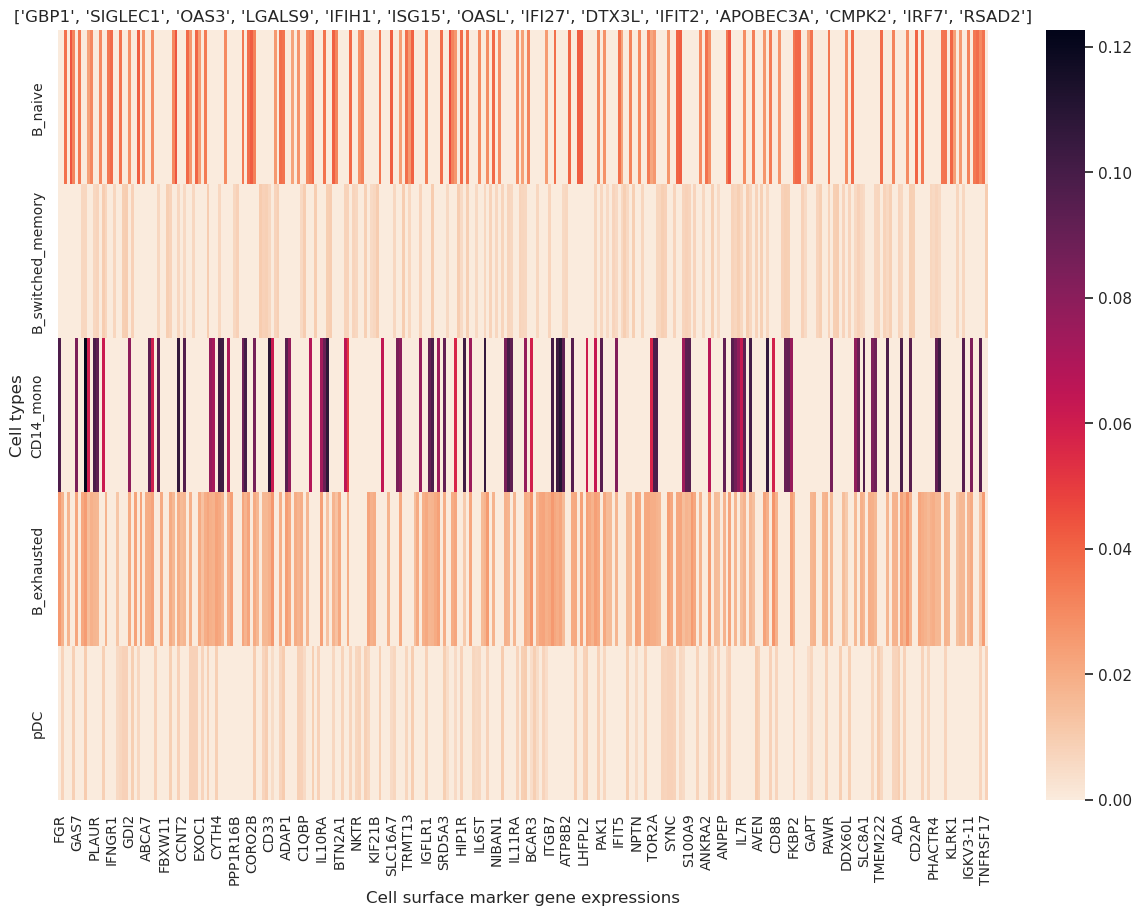

In [168]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

averagedMatrix=[]
sums=[]
for cell_t in cellTypes:
    temp_df= cellMatrix.loc[cellMatrix['cell_type']==cell_t]
    averagedMatrix.append(cellMatrix.loc[cellMatrix['cell_type']==cell_t].median())
    sums.append(adata.obs.loc[adata.obs["cell_type"]==cell_t,"total_counts"].sum()) # sum number of cells for each cell type
averagedMatrix=pd.DataFrame(averagedMatrix)
averagedMatrix.index=cellTypes
averagedMatrix.clip(0, inplace=True)
sums=sums/sum(sums)
#display(averagedMatrix['FGR'])
#upregProts_effective=averagedMatrix.loc[:,upregProts].sum(axis=1, numeric_only=True)/len(upregProts)
upregProts_effective=averagedMatrix.loc[:,upregProts].mean(axis=1)
#print(upregProts_effective)
#scoreMatrix=abundanceMatrix.copy()
scoreMatrix=abundanceMatrix.mul(upregProts_effective, axis=0) # multiply by upregulated protein presence in each cell type
scoreMatrix=scoreMatrix.mul(sums, axis=0)
#scoreMatrix=scoreMatrix[genes_found]
#display(abundanceMatrix)
#display(scoreMatrix)
# Filter averagedMatrix to keep only columns that are in surf_markers
#abundanceMatrix = averagedMatrix.loc[:, averagedMatrix.columns.isin(surf_markers)].copy()

#display(markers_averagedMatrix)
sns.set_theme(style="whitegrid", palette="pastel")
fig,ax=plt.subplots(figsize=(15,10))
#norm=LogNorm(vmin=1/10000, vmax=10)
scoreMatrix=scoreMatrix.dropna(axis=1, how='all')
sns_plot=sns.heatmap(scoreMatrix,ax=ax,cmap='rocket_r')

ax.set_title(upregProts)
ax.set(xlabel='Cell surface marker gene expressions', ylabel='Cell types')
#ax.set_xticks(range(len(nonzero_markers_averagedMatrix.columns))) 

#ax.set_xticklabels(nonzero_markers_averagedMatrix.columns) 
sns_plot.tick_params(labelsize=10)
fig.savefig(dataset+"_heatmap.png")

In [155]:
averagedMatrix.mul(upregProts_effective, axis=0)['FGR']

B_naive              0.000000
B_switched_memory    0.000000
CD14_mono            0.166876
B_exhausted          0.935365
pDC                  0.000000
Name: FGR, dtype: float32

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

'''averagedMatrix=pd.DataFrame()
sums=[]
for cell_t in cellTypes:
    temp_df= cellMatrix.loc[cellMatrix['cell_type']==cell_t]
    averagedMatrix=averagedMatrix.append(conditional_non_zero_median_df(temp_df), ignore_index=True) # averaging uses conditional non zero median of cell counts
    sums.append(adata.obs.loc[adata.obs["cell_type"]==cell_t,"total_counts"].sum()) # sum number of cells for each cell type
averagedMatrix.index=cellTypes'''

# normalize counts to make them 0 to 1
'''for index in cellTypes:
    averagedMatrix.loc[index] = (averagedMatrix.loc[index] - averagedMatrix.loc[index].min()) / (averagedMatrix.loc[index].max() - averagedMatrix.loc[index].min())'''
'''wholeDf = averagedMatrix.unstack()
wholeDf_range=wholeDf.max()-wholeDf.min() # assuming minimum in whole dataframe is zero
for index in cellTypes:
    averagedMatrix.loc[index] = (averagedMatrix.loc[index]-wholeDf.min()) / wholeDf_range'''
    
#sums_norm=sums/sum(sums) #sums are normalized with respect to the total number. In other words, each entry in sums represents that cell type's fraction in that tissue
#upregProts_effective=averagedMatrix.loc[:,upregProts].sum(axis=1, numeric_only=True)/len(upregProts)
averagedMatrix=averagedMatrix.mul(upregProts_effective, axis=0) # multiply by upregulated protein presence in each cell type
averagedMatrix=averagedMatrix.mul(sums_norm, axis=0) # multiply by cell type's fraction in tissue

# Filter averagedMatrix to keep only columns that are in surf_markers
markers_averagedMatrix = averagedMatrix.loc[:, averagedMatrix.columns.isin(surf_markers)].copy()

#display(markers_averagedMatrix)
sns.set_theme(style="whitegrid", palette="pastel")
fig,ax=plt.subplots(figsize=(15,10))
norm=LogNorm(vmin=1/10000, vmax=10)
nonzero_markers_averagedMatrix=markers_averagedMatrix.dropna(axis=1, how='all')
sns_plot=sns.heatmap(nonzero_markers_averagedMatrix,ax=ax,cmap='rocket_r', norm=norm,xticklabels=True)

ax.set_title(upregProts)
ax.set(xlabel='Cell surface marker gene expressions', ylabel='Cell types')
#ax.set_xticks(range(len(nonzero_markers_averagedMatrix.columns))) 

#ax.set_xticklabels(nonzero_markers_averagedMatrix.columns) 
sns_plot.tick_params(labelsize=10)
fig.savefig(dataset+"_heatmap.png")

In [ ]:
fig.savefig("NORMAL"+"_heatmap.png")

# Targets already used in CAR T-cell therapy

In [ ]:
repurposableTargets = [
    "CD80",
    "TNFRSF17",
    "CD22",
    "CD19",
    "NY-ESO-1",
    "CD66e",
    "CD27-L",
    "CLDN18",
    "CD137",
    "CD38",
    "DLL3",
    "EPHA2",
    "EGFR",
    "EGFR vIII",
    "EBV LMP1",
    "HER2",
    "GPRC5D",
    "GCPII",
    "GPC3",
    "PMEL",
    "CD34",
    "ICAM1",
    "IL3RA",
    "CD20",
    "TNFRSF8",
    "MAGEA1",
    "MAGEA4",
    "MSLN",
    "MUC1",
    "CD33",
    "CD371",
    "NCAM1",
    "L1CAM",
    "ROR1",
    "ROR2",
    "MME",
    "KLRK1",
    "PD-L1",
    "PROM1",
    "PSCA",
    "MET",
    "CS1",
    "SDC1",
    "CD7",
    "TRBC1",
    "CD4",
    "TRAIL-R2",
    "EPCAM",
    "KIT"
]

# Violin plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

only_famous_targets=False
n=5

# Assuming the necessary variables (adata, cellMatrix, cellTypes, surf_markers, etc.) are defined elsewhere

# Get top n scores in averagedMatrix with column and index names
if(only_famous_targets):
    usedMarkers_averagedMatrix=averagedMatrix.loc[:, averagedMatrix.columns.isin(repurposableTargets)].copy()
    top_scores = usedMarkers_averagedMatrix.unstack().sort_values(ascending=False).head(n)
else:
    top_scores = markers_averagedMatrix.unstack().sort_values(ascending=False).head(n)
    
top_info = [(index[1], index[0], value) for index, value in top_scores.items()]

# Display the top n scores with column and index names
print("Top " + str(n) + " Scores for " + str(upregProts) + ":")
fig, axs = plt.subplots(nrows=n, ncols=3, figsize=(18, 3*n), gridspec_kw={'width_ratios': [3, 1,1]})
i = 0

for col, idx, val in top_info:
    if idx in repurposableTargets:
        repurp = "\tTested for cancer"
    else:
        repurp = ""

    # Get the data to be plotted in the violin plot
    violin_data_1 = [cellMatrix.loc[cellMatrix['cell_type'] == col, prot] for prot in upregProts]
    violin_data_2 = markers_averagedMatrix.loc[col, :].dropna()

    # Plot the combined violin plot for multiple upregProts
    violin_parts_1 = axs[i, 0].violinplot(violin_data_1, showmedians=True, showextrema=True)
    axs[i, 0].set_xticks(np.arange(1, len(upregProts) + 1))
    axs[i, 0].set_xticklabels(upregProts)
    axs[i, 0].set_title("Disease-related proteins in " + col)
    axs[i, 0].set_ylabel("Gene expression")

    # Customize violin plot colors
    for j, pc in enumerate(violin_parts_1['bodies']):
        pc.set_facecolor('#FFC107')
        pc.set_edgecolor('black')
        pc.set_alpha(0.6)

    for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
        vp = violin_parts_1[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

    # Plot the second violin plot
    violin_parts_2 = axs[i, 1].violinplot([violin_data_2], showmedians=True, showextrema=True)
    axs[i, 1].set_xticks([1])
    axs[i, 1].set_xticklabels([idx])
    axs[i, 1].set_title(idx + " marker content in " + col)
    axs[i, 1].set_ylabel("Gene expression")

    for pc in violin_parts_2['bodies']:
        pc.set_facecolor('#1E88E5')
        pc.set_edgecolor('black')
        pc.set_alpha(0.6)

    for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
        vp = violin_parts_2[partname]
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

    # Plot the pie chart
    piechart = axs[i, 2].pie([sums_norm[cellTypes.index(col)], 1 - sums_norm[cellTypes.index(col)]],
                             labels=[col, "Other"], colors=['#D81B60', 'grey'],
                             startangle=90, explode=[0.1, 0],
                             textprops={'size': 'smaller'})
    axs[i, 2].set_title("Cell type abundance")

    print(f"Cell type: {col}, Surface marker: {idx}, Value: {val:.7f}" + repurp)
    i += 1

plt.tight_layout()
plt.show()
fig.savefig(dataset + "_" + upregProt + "_violin.png")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Example data (replace with your own data)
y_true = upregProts_effective
y_scores = markers_averagedMatrix.loc[:,'CD4'].fillna(0)

# Prediction-Error Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction-Error Plot')

# Residuals Plot
residuals = y_test - y_pred

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.hlines(0, min(y_pred), max(y_pred), colors='r', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()


In [ ]:
print(upregProts_effective)
print(markers_averagedMatrix.loc[:,'GAPDH'].fillna(0))

In [ ]:
import zipfile
import os

zipfile_name=dataset+"_Figures.zip"
directory = "/kaggle/working/"  # The directory to search in

# Find the files that contain the search string
files_to_zip = [f for f in os.listdir(directory) if dataset in f and not "zip" in f]

# Create the zip file and add the filtered files
with zipfile.ZipFile(zipfile_name, 'w') as zipf:
    for file in files_to_zip:
        zipf.write(os.path.join(directory, file), arcname=file)

In [ ]:
#!rm GSM3666108_SC136SSCUP_Figures.zip
